In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [3]:
class Particle(object):
    def __init__(self, n, low=-50, high=50):
        super().__init__()
        self.state = np.random.uniform(low=low, high=high, size=n)
        self.best_state = np.copy(self.state)
        self.velocity = np.zeros_like(self.state)
        self.best_score = -10000000
    
    def compute_velocity(self, inertia_factor, global_best):
        exploitation = np.random.random() * (self.best_state - self.state)
        exploration = np.random.random() * (global_best.state - self.state)
        inertia = inertia_factor * self.velocity
        self.velocity = inertia + exploration + exploitation
    
    def apply_velocity_update(self):
        self.state = self.state + self.velocity
        
    def compute_fitness(self, fitness_func):
        fitness = fitness_func(self.state)
        if self.best_score < fitness:
            self.best_score = fitness
            self.best_state = self.state
        return fitness

In [107]:
#Disk function, which takes in input vector(x,y) as well as centre of disk(a,b) and radius r
def P(x,y,a,b,r):
    return (x-a)**2 + (y-b)**2 - r**2

In [108]:
def rosenbrock(x,y):
    return 100*((y-x**2))**2 + (1-x)**2

In [150]:
def fitness(state):
    x = state[0]
    y = state[1]
    
    #Setting centre of disk to the origin and radius to 1
    T = rosenbrock(x,y) + 100*(max(0,P(x,y,0,0,1)))**2
    #Note that as long as the disk includes the global minumun (1,1) this will be the final answer
    #For example with center = (0,0) and radius=2, we get the global minimum
    #T = rosenbrock(x,y) + 100*(max(0,P(x,y,0,0,2)))**2
    return -T

In [151]:
n = 2
num_particles = 1000
num_iterations = 100
inertia_factor = 0.5
global_best = np.zeros(n)
global_best_fitness = -1000000000

In [152]:
particles = [Particle(n) for _ in range(num_particles)]
convergence_curve = []

In [153]:
for i in range(num_iterations):
    for p in particles:
        fitness_of_p = p.compute_fitness(fitness)
        if fitness_of_p > global_best_fitness:
            global_best_fitness = fitness_of_p
            global_best = p
    for p in particles:
        p.compute_velocity(inertia_factor, global_best)
    for p in particles:
        p.apply_velocity_update()
    convergence_curve.append(global_best_fitness)

In [154]:
gbs=global_best.state
print("Solution: ",gbs,"\nFunction value:", rosenbrock(gbs[0],gbs[1]))

Solution:  [0.78658746 0.61796997] 
Function value: 0.045601142007430935


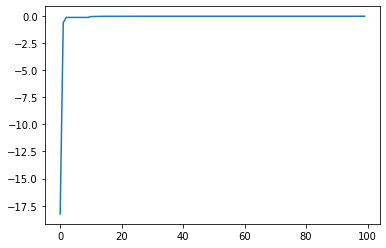

In [155]:
plot(list(range(len(convergence_curve))), convergence_curve)